# Plotting Morris Index Results

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import data
ages = ['UNDER5', 'AGE517', 'AGE1829', 'AGE4049', 'AGE3039', 'AGE5064', 'AGE6574', 'AGE75PLUS']
morris = 'figures_morris'

data = []
for i in range(len(ages)):
    x = pd.read_csv('./results/' + ages[i] + '/' + morris + '/Morris.csv')
    data.append(x)
     
age_total = []
# Age 
for i in range(len(ages)):
    age_total.append(data[i][data[i].Feature == ages[i]])

In [3]:
# Function for formatter
import matplotlib
class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin=None, vmax=None):
        self.format = self.fformat
        if self._useMathText:
            self.format = r'$\mathdefault{%s}$' % self.format

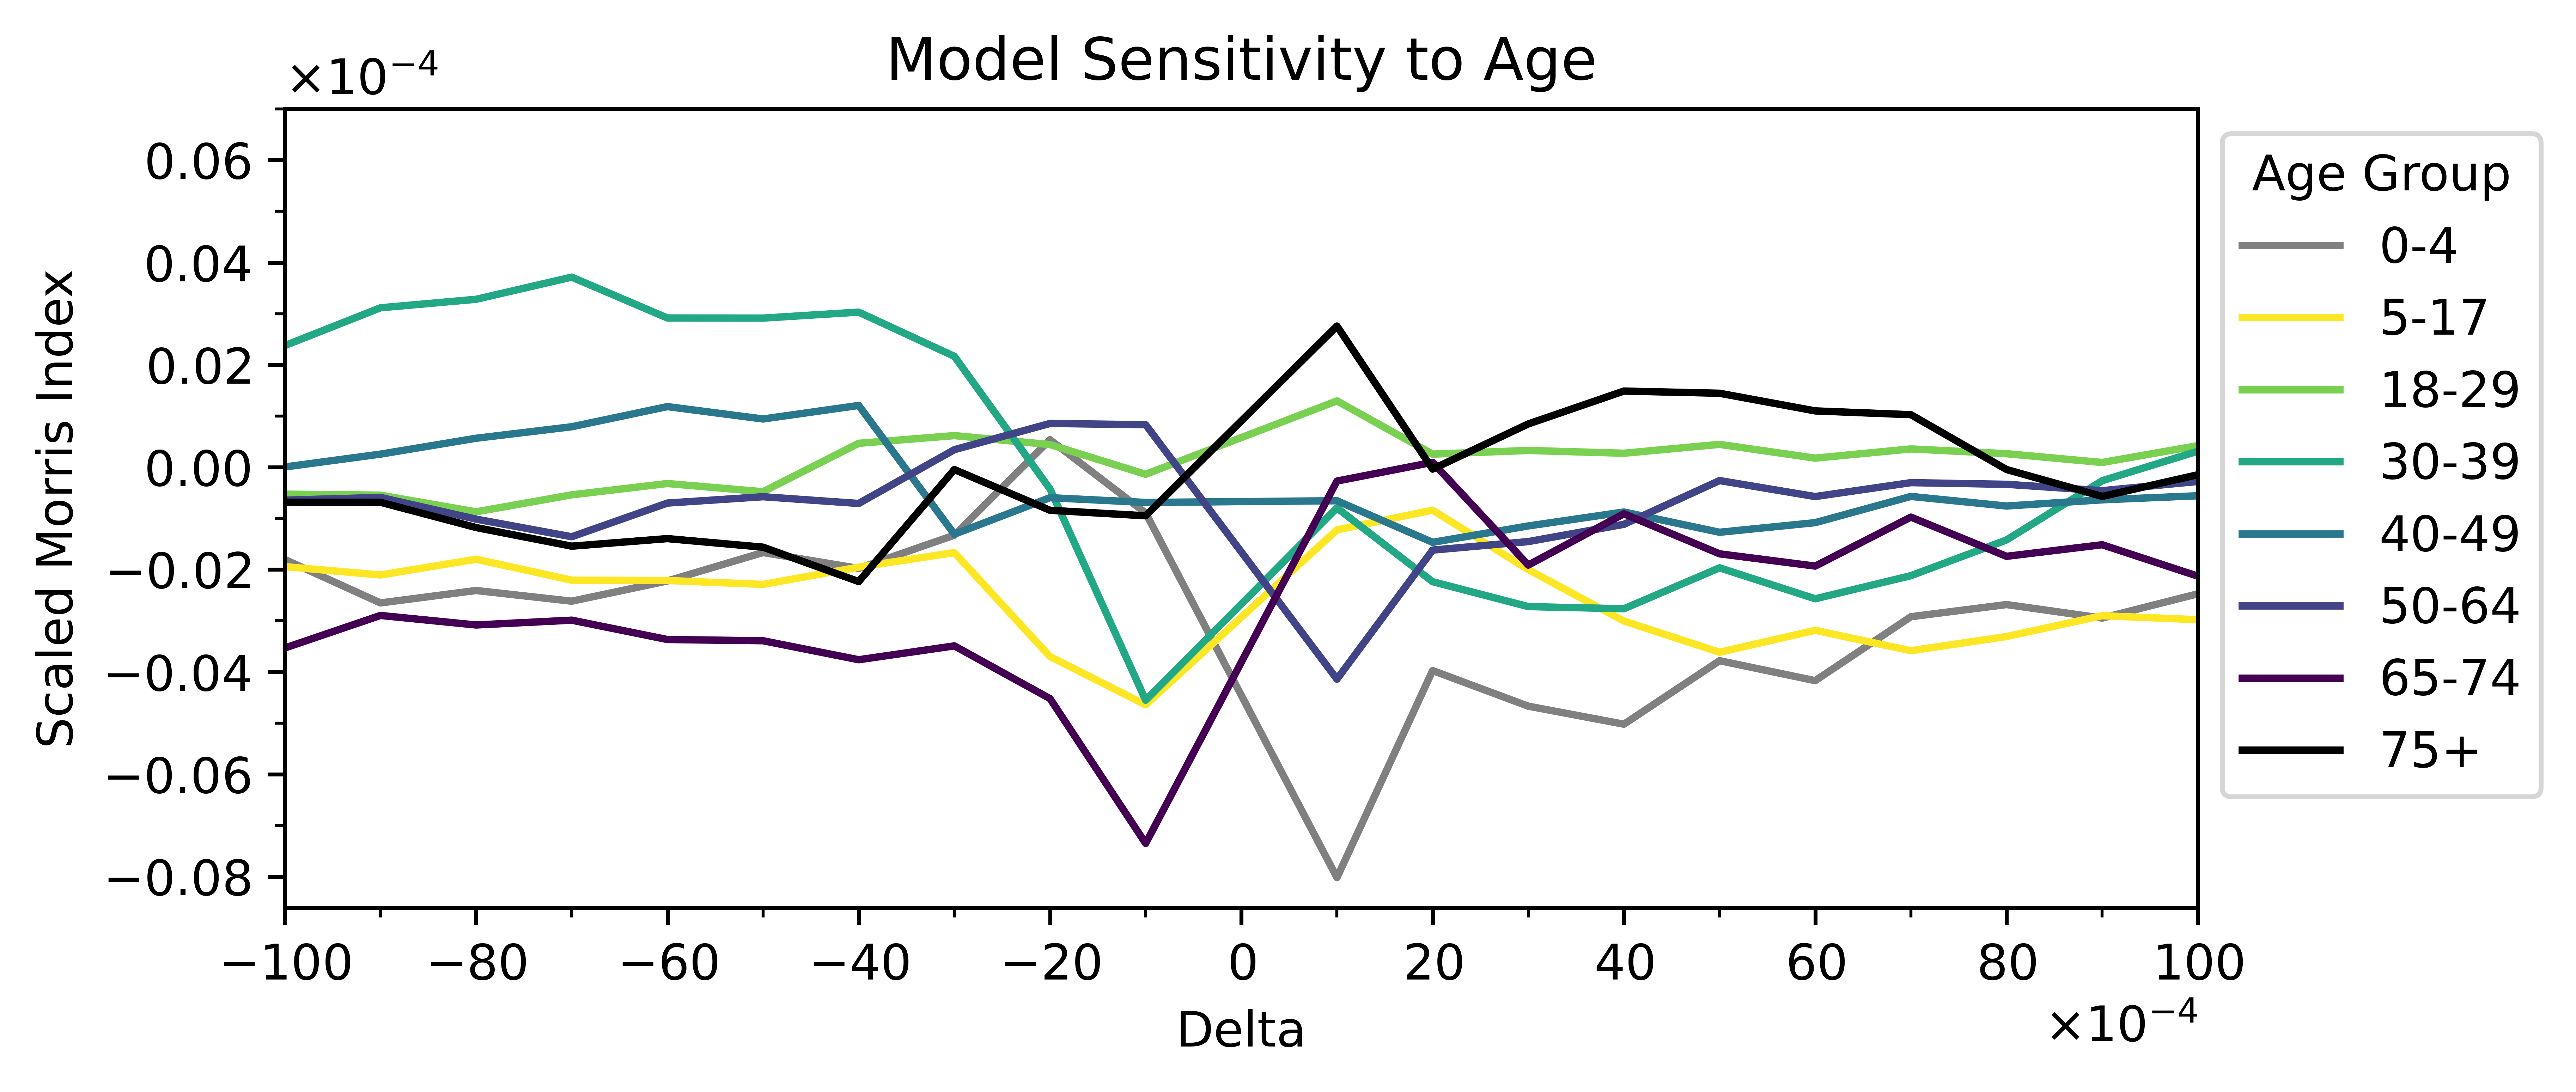

In [4]:
# Plot
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

mpl.rcParams['figure.dpi'] = 1000
fig, ax = plt.subplots(nrows=1, ncols=1, facecolor='w', sharey=True, figsize=(7, 3))
label = ['0-4', '5-17', '18-29', '30-39', '40-49', '50-64', '65-74', '75+']
color = ['gray', '#fde725', '#7ad151', '#22a884', '#2a788e', '#414487', '#440154', 'black']

# plot the same data on both axes
for i in range(len(ages)):
    plt.plot(age_total[i].Delta, age_total[i].Morris_sensitivity, '-', linewidth=1.5, label=label[i], color=color[i])
    
# Scale axes
#plt.xscale('log', base=10)
ax.yaxis.set_major_formatter(OOMFormatter(-4, "%1.2f"))
ax.ticklabel_format(axis='y', style='sci', scilimits=(-4,-4))   
ax.xaxis.set_major_formatter(OOMFormatter(-4, "%1.0f"))
ax.ticklabel_format(axis='x', style='sci', scilimits=(-4,-4))
ax.xaxis.get_offset_text().set_visible(True)

# Vertical lines
#plt.axvline(x=10e-5, linestyle='--', color='gray')
#plt.axvline(x=100e-5, linestyle='--', color='gray')

# Format plot
ax.set_xticks([-0.01 , -0.008, -0.006, -0.004,
               -0.002, 0, 0.002, 0.004, 0.006,
               0.008, 0.01 ])
#ax.set_yticks([0, 4e-4, 8e-4, 12e-4, 16e-4, 20e-4])
ax.set_xlim(-0.01, 0.01)
#ax.set_ylim(-2e-5, 2e-5)

# Minor ticks
ax.set_xticks([-90e-4, -70e-4, -50e-4, -30e-4, -10e-4, 10e-4, 30e-4, 50e-4, 70e-4, 90e-4], minor=True)
ax.set_yticks([-0.07e-4, -0.05e-4, -0.03e-4, -0.01e-4, 0.01e-4, 0.03e-4, 0.05e-4, 0.07e-4], minor=True)

# Add labels
plt.ylabel('Scaled Morris Index')
plt.xlabel('Delta')
plt.title('Model Sensitivity to Age')
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left', title='Age Group')
plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

# Obtaining Final Ranking

In [5]:
for i in range(0, len(ages)):
    data[i].Delta = round(data[i].Delta, 3)

In [6]:
deltas = list(data[0].Delta.unique())

In [7]:
ranking = pd.DataFrame(np.zeros(len(ages)))
ranking = ranking.reindex(index = ['0 - 4 Years','5 - 17 Years','18 - 29 Years', 
                                   '30 - 39 Years', '40 - 49 Years', 
                                   '50 - 64 Years', '65 - 74 Years', '75+ Years'])
for j in range(0, 20): 
    one = []
    for i in range(0, len(ages)):
        x = data[i][(data[i]['Delta'] == deltas[j])
                & (data[i]['Feature'] != 'VaccinationFull')]['Morris_sensitivity']
        one.append(x.values[0])
    ranking.insert(j, str(deltas[j]), one, True)
    
ranking = ranking.drop(0, axis=1)

In [8]:
ranking

,-0.01,-0.009,-0.008,-0.007,-0.006,-0.005,-0.004,-0.003,-0.002,-0.001,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01
0 - 4 Years,-1.803426e-06,-2.652687e-06,-2.410031e-06,-2.618645e-06,-2.223372e-06,-1.667629e-06,-1.977762e-06,-1.329079e-06,5.365196e-07,-8.945283e-07,-8.021903e-06,-3.974826e-06,-4.670656e-06,-5.022620e-06,-3.781785e-06,-4.171880e-06,-2.922419e-06,-2.684769e-06,-2.948969e-06,-2.474607e-06
5 - 17 Years,-1.943252e-06,-2.106387e-06,-1.798162e-06,-2.208036e-06,-2.214116e-06,-2.290731e-06,-1.953278e-06,-1.669493e-06,-3.700702e-06,-4.643949e-06,-1.224453e-06,-8.394791e-07,-2.001717e-06,-3.006460e-06,-3.616527e-06,-3.188146e-06,-3.586392e-06,-3.309364e-06,-2.902447e-06,-2.980759e-06
18 - 29 Years,-5.266315e-07,-5.464833e-07,-8.721139e-07,-5.401910e-07,-3.192239e-07,-4.792893e-07,4.666950e-07,6.172763e-07,4.419823e-07,-1.380092e-07,1.296006e-06,2.552967e-07,3.272305e-07,2.726368e-07,4.460367e-07,1.769365e-07,3.570171e-07,2.635125e-07,9.223524e-08,4.211141e-07
30 - 39 Years,2.376215e-06,3.115121e-06,3.281491e-06,3.714610e-06,2.915978e-06,2.913963e-06,3.030404e-06,2.166858e-06,-4.253748e-07,-4.553881e-06,-7.959007e-07,-2.237932e-06,-2.724322e-06,-2.766680e-06,-1.966873e-06,-2.572010e-06,-2.120217e-06,-1.421795e-06,-2.642955e-07,3.126804e-07
40 - 49 Years,4.215897e-09,2.552231e-07,5.656140e-07,7.902463e-07,1.184183e-06,9.421627e-07,1.206513e-06,-1.309867e-06,-5.960081e-07,-6.890203e-07,-6.558836e-07,-1.468367e-06,-1.148203e-06,-8.757213e-07,-1.271962e-06,-1.083864e-06,-5.711673e-07,-7.589742e-07,-6.378162e-07,-5.585325e-07
50 - 64 Years,-6.439204e-07,-5.910973e-07,-1.015015e-06,-1.359314e-06,-7.011041e-07,-5.772898e-07,-7.088415e-07,3.424163e-07,8.547985e-07,8.306141e-07,-4.142659e-06,-1.620333e-06,-1.453939e-06,-1.116604e-06,-2.613372e-07,-5.739234e-07,-3.021977e-07,-3.345658e-07,-4.590532e-07,-2.787929e-07
65 - 74 Years,-3.533832e-06,-2.897671e-06,-3.083913e-06,-2.989859e-06,-3.367983e-06,-3.391899e-06,-3.763117e-06,-3.492503e-06,-4.522814e-06,-7.352877e-06,-2.709409e-07,9.469517e-08,-1.913452e-06,-9.105305e-07,-1.693106e-06,-1.932718e-06,-9.754814e-07,-1.742167e-06,-1.515425e-06,-2.129826e-06
75+ Years,-6.846279e-07,-6.853663e-07,-1.179445e-06,-1.543773e-06,-1.395765e-06,-1.563127e-06,-2.235496e-06,-4.614980e-08,-8.422165e-07,-9.495158e-07,2.758050e-06,-3.703490e-08,8.453079e-07,1.487988e-06,1.445247e-06,1.100144e-06,1.026330e-06,-4.524351e-08,-5.708629e-07,-1.477279e-07


In [9]:
for i in ranking.columns: 
    ranking[i] = ranking[i].rank(ascending=True)

In [10]:
ranking

,-0.01,-0.009,-0.008,-0.007,-0.006,-0.005,-0.004,-0.003,-0.002,-0.001,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01
0 - 4 Years,3.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,7.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0
5 - 17 Years,2.0,3.0,3.0,3.0,3.0,2.0,4.0,2.0,2.0,2.0,3.0,5.0,3.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0
18 - 29 Years,6.0,6.0,6.0,6.0,6.0,6.0,6.0,7.0,6.0,7.0,7.0,8.0,7.0,7.0,7.0,7.0,7.0,8.0,8.0,8.0
30 - 39 Years,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,5.0,3.0,4.0,2.0,2.0,3.0,3.0,3.0,3.0,4.0,7.0,7.0
40 - 49 Years,7.0,7.0,7.0,7.0,7.0,7.0,7.0,4.0,4.0,6.0,5.0,4.0,6.0,6.0,5.0,5.0,5.0,5.0,4.0,4.0
50 - 64 Years,5.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0,8.0,8.0,2.0,3.0,5.0,4.0,6.0,6.0,6.0,6.0,6.0,5.0
65 - 74 Years,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,7.0,4.0,5.0,4.0,4.0,4.0,3.0,3.0,3.0
75+ Years,4.0,4.0,4.0,4.0,4.0,4.0,2.0,5.0,3.0,4.0,8.0,6.0,8.0,8.0,8.0,8.0,8.0,7.0,5.0,6.0


In [11]:
ranking['mean_rows'] = ranking.mean(axis = 1)

In [12]:
colors = "Blues"
ranking[['mean_rows']].style.background_gradient(colors, subset=['mean_rows'])\
       .format({'mean_rows': '{:.2f}'})

,mean_rows
0 - 4 Years,2.25
5 - 17 Years,2.40
18 - 29 Years,6.80
30 - 39 Years,5.50
40 - 49 Years,5.60
50 - 64 Years,5.30
65 - 74 Years,2.65
75+ Years,5.50


# Preparation of Ground Truth Data for COVID-19 Infection Rates by Age Subgroup

# Cases by Age
https://data.cdc.gov/Public-Health-Surveillance/COVID-19-Weekly-Cases-and-Deaths-by-Age-Race-Ethni/hrdz-jaxc

In [13]:
# Import data from csv
data = pd.read_csv('Ground Truth/COVID-19_Weekly_Cases_and_Deaths_by_Age__Race_Ethnicity__and_Sex.csv')

In [14]:
# Select all U.S. jurisdictions, age groups, sexes, races/ethnicities
data = data[data.jurisdiction == 'US']
data = data[data.age_group != 'Overall']
data = data[data.sex == 'Overall']
data = data[data.race_ethnicity_combined == 'Overall']
data = data.drop(columns=['jurisdiction', 'sex', 'race_ethnicity_combined', \
                          'deaths', 'death_rate_per_100k', 'case_rate_per_100k'])

In [15]:
# Convert end_of_week column to DateTime
data['end_of_week'] = pd.to_datetime(data['end_of_week'])
data = data.sort_values(by=['end_of_week', 'age_group'])
data = data.reset_index().drop(columns=['index'])

In [16]:
# Select date range (end_of_week = 3/7/2020 to end_of_week = 11/27/2021)
data = data.iloc[0:910, :]

In [17]:
data

,end_of_week,age_group,cases
0,2020-03-07,0 - 4 Years,38
1,2020-03-07,12 - 15 Years,50
2,2020-03-07,16 - 17 Years,48
3,2020-03-07,18 - 29 Years,743
4,2020-03-07,30 - 39 Years,1033
...,...,...,...
905,2021-11-27,40 - 49 Years,80225
906,2021-11-27,5 - 11 Years,58837
907,2021-11-27,50 - 64 Years,103463
908,2021-11-27,65 - 74 Years,38726


In [18]:
# Find sum of all cases for each age group during time period
data = data.groupby(by=["age_group"]).sum('numeric_only').sort_index()

In [19]:
# Create 5-17 age group
data.loc['5 - 17 Years'] = data[data.index == '5 - 11 Years'].cases[0] + \
                           data[data.index == '12 - 15 Years'].cases[0] + \
                           data[data.index == '16 - 17 Years'].cases[0] 

# Drop unneeded age groups
data = data.drop(['5 - 11 Years', '12 - 15 Years',  '16 - 17 Years']).sort_index()

In [20]:
data

,cases
age_group,
0 - 4 Years,1249223
18 - 29 Years,10018923
30 - 39 Years,7760789
40 - 49 Years,6767348
5 - 17 Years,6184296
50 - 64 Years,8820765
65 - 74 Years,3289094
75+ Years,2505606


# Population by Age
## These data are estimates for April 1, 2020
https://www.census.gov/data/tables/time-series/demo/popest/2020s-national-detail.html

In [21]:
# Import data from csv
pop = pd.read_csv('Ground Truth/nc-est2021-agesex-res.csv', usecols=['SEX', 'AGE', 'ESTIMATESBASE2020'])
pop = pop[pop.SEX == 0]
pop = pop.rename(columns={'ESTIMATESBASE2020': 'population', 'AGE': 'age'})
pop = pop.drop(columns=['SEX'])

In [22]:
# Create age groups
age_04 = pop.iloc[0:5].population.values.sum()
age_517 = pop.iloc[5:18].population.values.sum()
age_1829 = pop.iloc[18:30].population.values.sum()
age_3039 = pop.iloc[30:40].population.values.sum()
age_4049 = pop.iloc[40:50].population.values.sum()
age_5064 = pop.iloc[50:65].population.values.sum()
age_6574 = pop.iloc[65:75].population.values.sum()
age_75plus = pop.iloc[75:101].population.values.sum()
pops = [age_04, age_517, age_1829, age_3039, age_4049, age_5064, age_6574, age_75plus]

In [23]:
# Using DataFrame.insert() to add a column
data.insert(1, "population", pops, True)

In [24]:
# Final data frame
data = data.reindex(index = ['0 - 4 Years','5 - 17 Years','18 - 29 Years', '30 - 39 Years', '40 - 49 Years', \
                             '50 - 64 Years', '65 - 74 Years', '75+ Years'])
data

,cases,population
age_group,,
0 - 4 Years,1249223,19392551
5 - 17 Years,6184296,41003731
18 - 29 Years,10018923,54992661
30 - 39 Years,7760789,53013409
40 - 49 Years,6767348,45034182
50 - 64 Years,8820765,63876118
65 - 74 Years,3289094,32346340
75+ Years,2505606,21790289


# Calculate Ranking for each Age Group

In [25]:
# Calculate percentage of age infected (total pop)
percent_pop = (data.cases.values / data.population.values.sum()) * 100
data.insert(2, "% of pop", np.round(percent_pop, 2), True)

# Calculate percentage of age infected 
percent_group = (data.cases / data.population).values * 100
data.insert(3, "% of group", np.round(percent_group, 2), True)

# Add Morris ranking
morris = ranking['mean_rows']
data.insert(4, 'morris', morris, True)

In [26]:
data['% of group'].values

array([ 6.44, 15.08, 18.22, 14.64, 15.03, 13.81, 10.17, 11.5 ])

In [27]:
data = data.drop(columns=['cases', 'population'])

In [28]:
data = data.rename({'% of pop': 'Population',
                    '% of group': 'Group',
                    'morris': 'Morris'}, axis=1) 

In [29]:
data.index.name = 'Age Group'

In [30]:
data['Population'] = data['Population'].rank(ascending=True)

In [31]:
data['Group'] = data['Group'].rank(ascending=True)

In [32]:
data['Morris'] = data['Morris'].rank(ascending=True)

In [33]:
data

,Population,Group,Morris
Age Group,,,
0 - 4 Years,1.0,1.0,1.0
5 - 17 Years,4.0,7.0,2.0
18 - 29 Years,8.0,8.0,8.0
30 - 39 Years,6.0,5.0,5.5
40 - 49 Years,5.0,6.0,7.0
50 - 64 Years,7.0,4.0,4.0
65 - 74 Years,3.0,2.0,3.0
75+ Years,2.0,3.0,5.5


In [34]:
# Add Morris ranking
change = abs(data['Population'] - data['Morris'])
data.insert(3, '|Morris - Population|', change, True)

change2 = abs(data['Group'] - data['Morris'])
data.insert(4, '|Morris - Group|', change2, True)

In [35]:
data\
    .style.background_gradient('Blues', subset=['Population', 'Group', 'Morris'])\
    .format({'Population': '{:.0f}', 'Group': '{:.0f}', 'Morris': '{:.0f}',
             '|Morris - Population|': '{:.0f}', '|Morris - Group|': '{:.0f}'})\
    .background_gradient('Reds', subset=['|Morris - Population|', '|Morris - Group|'])\
    .set_properties( **{'text-align': 'center'})

,Population,Group,Morris,|Morris - Population|,|Morris - Group|
Age Group,,,,,
0 - 4 Years,1,1,1,0,0
5 - 17 Years,4,7,2,2,5
18 - 29 Years,8,8,8,0,0
30 - 39 Years,6,5,6,0,0
40 - 49 Years,5,6,7,2,1
50 - 64 Years,7,4,4,3,0
65 - 74 Years,3,2,3,0,1
75+ Years,2,3,6,4,2
